In [88]:
import wikipedia
import gensim.downloader as api
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
import re
from sklearn.decomposition import PCA

In [2]:
! pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=3e31348bc67e72d2b2ef4468c3562904b929abd92b45851ec9660b5e7d2135ad
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


1. Descarcăti un text mai mare in engleză (ex. un articol de pe wikipedia, vedeți cum mai jos).

In [73]:
# cum putem descarca continutul unui articol de pe wikipedia

page_title = "Jazz"
wikipedia.set_lang("en")  # vrem articole in Engleza
page = wikipedia.page(page_title, auto_suggest=False)

print(page.content[:200])


Jazz is a music genre that originated in the African-American communities of New Orleans, Louisiana, in the late 19th and early 20th centuries, with its roots in blues and ragtime. Since the 1920s Jaz


2. Încărcați modelul Word2Vec de la Google, la fel ca în laborator.

In [24]:
google_model = api.load("word2vec-google-news-300")

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
sw = stopwords.words('english')
page = page.content

In [71]:
pct = string.punctuation + '–'

In [75]:
sentences = page.split(". ")
sentences = [sentence.lower() for sentence in sentences]
sentences = [sentence.translate(str.maketrans('', '', pct)) for sentence in sentences]
sentences = [word_tokenize(sentence) for sentence in sentences]

filtered = []
for sentence in sentences:
  original = sentence
  sentence = [w for w in sentence if w not in sw]
  if len(sentence) < 1:
      sentence = original
  filtered.append(sentence)

print(filtered[:10])

[['jazz', 'music', 'genre', 'originated', 'africanamerican', 'communities', 'new', 'orleans', 'louisiana', 'late', '19th', 'early', '20th', 'centuries', 'roots', 'blues', 'ragtime'], ['since', '1920s', 'jazz', 'age', 'recognized', 'major', 'form', 'musical', 'expression', 'traditional', 'popular', 'music'], ['jazz', 'characterized', 'swing', 'blue', 'notes', 'complex', 'chords', 'call', 'response', 'vocals', 'polyrhythms', 'improvisation'], ['jazz', 'roots', 'european', 'harmony', 'african', 'rhythmic', 'ritualsas', 'jazz', 'spread', 'around', 'world', 'drew', 'national', 'regional', 'local', 'musical', 'cultures', 'gave', 'rise', 'different', 'styles'], ['new', 'orleans', 'jazz', 'began', 'early', '1910s', 'combining', 'earlier', 'brass', 'band', 'marches', 'french', 'quadrilles', 'biguine', 'ragtime', 'blues', 'collective', 'polyphonic', 'improvisation'], ['jazz', 'begin', 'single', 'musical', 'tradition', 'new', 'orleans', 'elsewhere'], ['1930s', 'arranged', 'danceoriented', 'swing'

In [76]:
page = page.lower()
page = re.sub(r'\d+', '', page)
page = re.sub(r'http\S+', '', page)
page = page.translate(str.maketrans('', '', string.punctuation))
page = word_tokenize(page)

In [77]:
page = [w for w in page if w not in sw]

In [78]:
d_in = {}
d_out = {}

for word in page:
  if word in google_model:
    if word not in d_in:
      d_in[word] = 1
  else:
    if word not in d_out:
      d_out[word] = 1 

print(f"Numarul de tokens distincte acoperite de model: {len(d_in)}")
print(f"Numarul de tokens distincte neacoperite de model: {len(d_out)}")

Numarul de tokens distincte acoperite de model: 2858
Numarul de tokens distincte neacoperite de model: 518


4. Determinați pentru toate perechile de cuvinte distincte din text care este similaritatea lor. Afișați top 3 cele mai similare perechi, și top 3 cele mai nesimilare.

In [79]:
w = w2v(
    filtered,
    min_count=3,
    sg=1,
    window=7
)


In [80]:
page = set(page)
page = list(page)

In [81]:
sim = {}
for word1 in page:
  for word2 in page:

    if word1 == word2 or word1 not in w.wv or word2 not in w.wv:
      continue

    if (word1, word2) not in sim:
      value = w.wv.similarity(word1, word2)
      sim[(word1, word2)] = value 



In [83]:
sorted_dict = sorted(sim.items(), key=lambda x:x[1]) 

print(f"Top 3 cele mai similare perechi:\n{sorted_dict[0]}\n{sorted_dict[1]}\n{sorted_dict[2]}\n ")
print(f"Top 3 cele mai nesimilare perechi:\n{sorted_dict[-1]}\n{sorted_dict[-2]}\n{sorted_dict[-3]}\n ")

print('' )

Top 3 cele mai similare perechi:
(('c', 'w'), 0.9727996)
(('w', 'c'), 0.9727996)
(('c', 'leaders'), 0.9744863)
 
Top 3 cele mai nesimilare perechi:
(('bebop', 'rhythm'), 0.9988282)
(('rhythm', 'bebop'), 0.9988282)
(('modal', 'james'), 0.99878925)
 



5. În următoarele cerințe vom compara modelul Google cu cel antrenat în cadrul laboratorului pe corpusul `text8`. Pentru fiecare cuvânt din lista următoare determinați lista celor mai similare cuvinte conform modelului Google și lista celor mai similare cuvinte conform modelului text8: `smart, king, big`. Observați diferențe?

In [84]:
text8 = api.load("text8")  # descarcam corpusul
text8_model = w2v(text8).wv

In [87]:
print(f"Cel mai similar lui \'smart\' {google_model.most_similar('smart')}")
print(f"Cel mai similar lui \'king\' {google_model.most_similar('king')}")
print(f"Cel mai similar lui \'big\' {google_model.most_similar('big')}")

print(f"Cel mai similar lui \'smart\' {text8_model.most_similar('smart')}")
print(f"Cel mai similar lui \'king\' {text8_model.most_similar('king')}")
print(f"Cel mai similar lui \'big\' {text8_model.most_similar('big')}")

Cel mai similar lui 'smart' [('intelligent', 0.6495277285575867), ('dumb', 0.5792694687843323), ('smartest', 0.5717369914054871), ('savvy', 0.5674132108688354), ('clever', 0.5656732320785522), ('smarter', 0.5632593035697937), ('shrewd', 0.5591170191764832), ('IPICO_produces', 0.5158055424690247), ('economic_certainty_Kracmer', 0.5094711780548096), ('Smart', 0.4991162121295929)]
Cel mai similar lui 'king' [('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
Cel mai similar lui 'big' [('huge', 0.7809856534004211), ('bigger', 0.684238612651825), ('biggest', 0.633652925491333), ('major', 0.6057687401771545), ('gigantic', 0.5822017192840576), ('HUGE', 0.560417115688324), ('large', 0.5561478734016418), ('humongous', 0

6. Plotați într-un grafic embeddings-urile reduse la 2 dimensiuni (folosind PCA) din modelul Google pentru cuvintele `car, motorcycle, bike, man, person, woman, child, king, queen, prince, plant, tree, flower`; separat construiți același grafic și pentru modelul antrenat folosind text8. Ce asemănări/diferențe observați?

In [89]:
words = ['car', 'motorcycle', 'bike', 'man', 'person', 'woman', 'child', 'king', 'queen', 'prince', 'plant', 'tree', 'flower']

google_vectors = [google_model[word] for word in words]
text8_vectors = [text8_model[word] for word in words] 

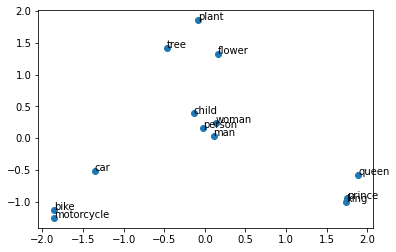

In [90]:
pca = PCA(n_components=2)
pca.fit(google_vectors)
google_2d = pca.transform(google_vectors)

x = [v[0] for v in google_2d]
y = [v[1] for v in google_2d]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(words):
    ax.annotate(txt, (x[i], y[i]))

plt.show()


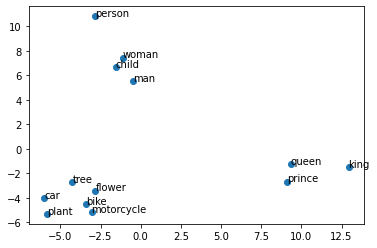

In [91]:
pca.fit(text8_vectors)
text8_2d = pca.transform(text8_vectors)

x = [v[0] for v in text8_2d]
y = [v[1] for v in text8_2d]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(words):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

Cuvintele par a fi mai bine grupate folosind modelul google din punct de vedere semantic. Am putea spune ca sunt bine grupate si folosinf modelul text8, doar ca 2 'clase' se amesteca, anume cea a plantelor si cea a autovehiculelor.